In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

Load the data

In [71]:
houses = pd.read_csv('kc_house_data.csv')

First let's drop a couple columns that seem redundant, and convert the date column into a datetime object

In [72]:
houses.drop(['sqft_living15', 'sqft_lot15', 'id'], axis=1, inplace=True)

In [73]:
houses['date_sold'] = pd.to_datetime(houses['date'])
houses.drop('date', axis=1, inplace=True)

In [74]:
houses.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  date_sold  
0    98178  47.5112 -122.257 2014-10-13  
1    98125  47.7210 -122.319 2014-12-09  
2    98028  47.7379 -122.233 2015-02-25  
3    98136  47.5208 -122.393 2014-12-09  
4    98074  47.6168 -122.045 2015-02-18

In [78]:
houses.describe().astype(object)

price  bedrooms bathrooms sqft_living     sqft_lot    floors  \
count    21613     21613     21613       21613        21613     21613   
mean    540182   3.37084   2.11476      2079.9        15107   1.49431   
std     367362  0.930062  0.770163     918.441      41420.5  0.539989   
min      75000         0         0         290          520         1   
25%     321950         3      1.75        1427         5040         1   
50%     450000         3      2.25        1910         7618       1.5   
75%     645000         4       2.5        2550        10688         2   
max    7.7e+06        33         8       13540  1.65136e+06       3.5   

       waterfront      view condition    grade sqft_above sqft_basement  \
count       21613     21613     21613    21613      21613         21613   
mean   0.00754176  0.234303   3.40943  7.65687    1788.39       291.509   
std     0.0865172  0.766318  0.650743  1.17546    828.091       442.575   
min             0         0         1        1        290             0   
25%             0         0         3        7       1190             0   
50%             0         0         3        7       1560             0   
75%             0         0         4        8       2210           560   
max             1         4         5       13       9410          4820   

      yr_built yr_renovated  zipcode       lat      long  
count    21613        21613    21613     21613     21613  
mean   1971.01      84.4023  98077.9   47.5601  -122.214  
std    29.3734      401.679   53.505  0.138564  0.140828  
min       1900            0    98001   47.1559  -122.519  
25%       1951            0    98033    47.471  -122.328  
50%       1975            0    98065   47.5718   -122.23  
75%       1997            0    98118    47.678  -122.125  
max       2015         2015    98199   47.7776  -121.315

In [79]:
houses.date_sold.describe()

count                   21613
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date_sold, dtype: object

Let's look at a histogram of all the sale prices. Looks like a handful of houses sell for as much as 8 million, but most are below 1 million

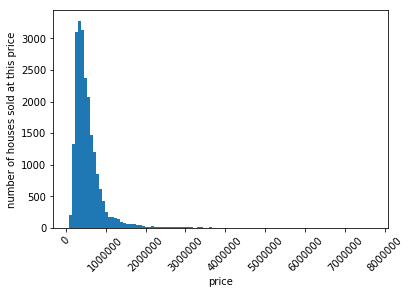

In [135]:
plt.hist(houses['price'], bins = 100)
plt.xticks(rotation=45)
plt.xlabel('price')
plt.ylabel('number of houses sold at this price')
plt.show()

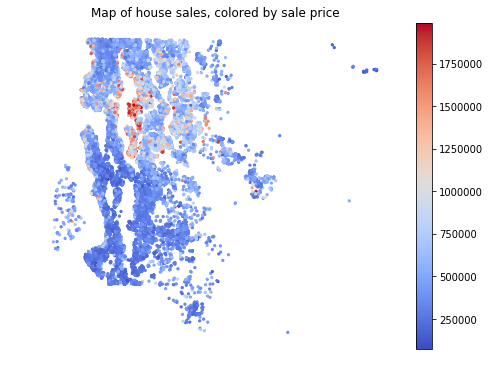

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(houses_clipped['long'], houses_clipped['lat'], c=houses_clipped['price'], s=5, cmap='coolwarm')
plt.colorbar()
plt.title('Map of house sales, colored by sale price')
plt.axis('off')
plt.show()

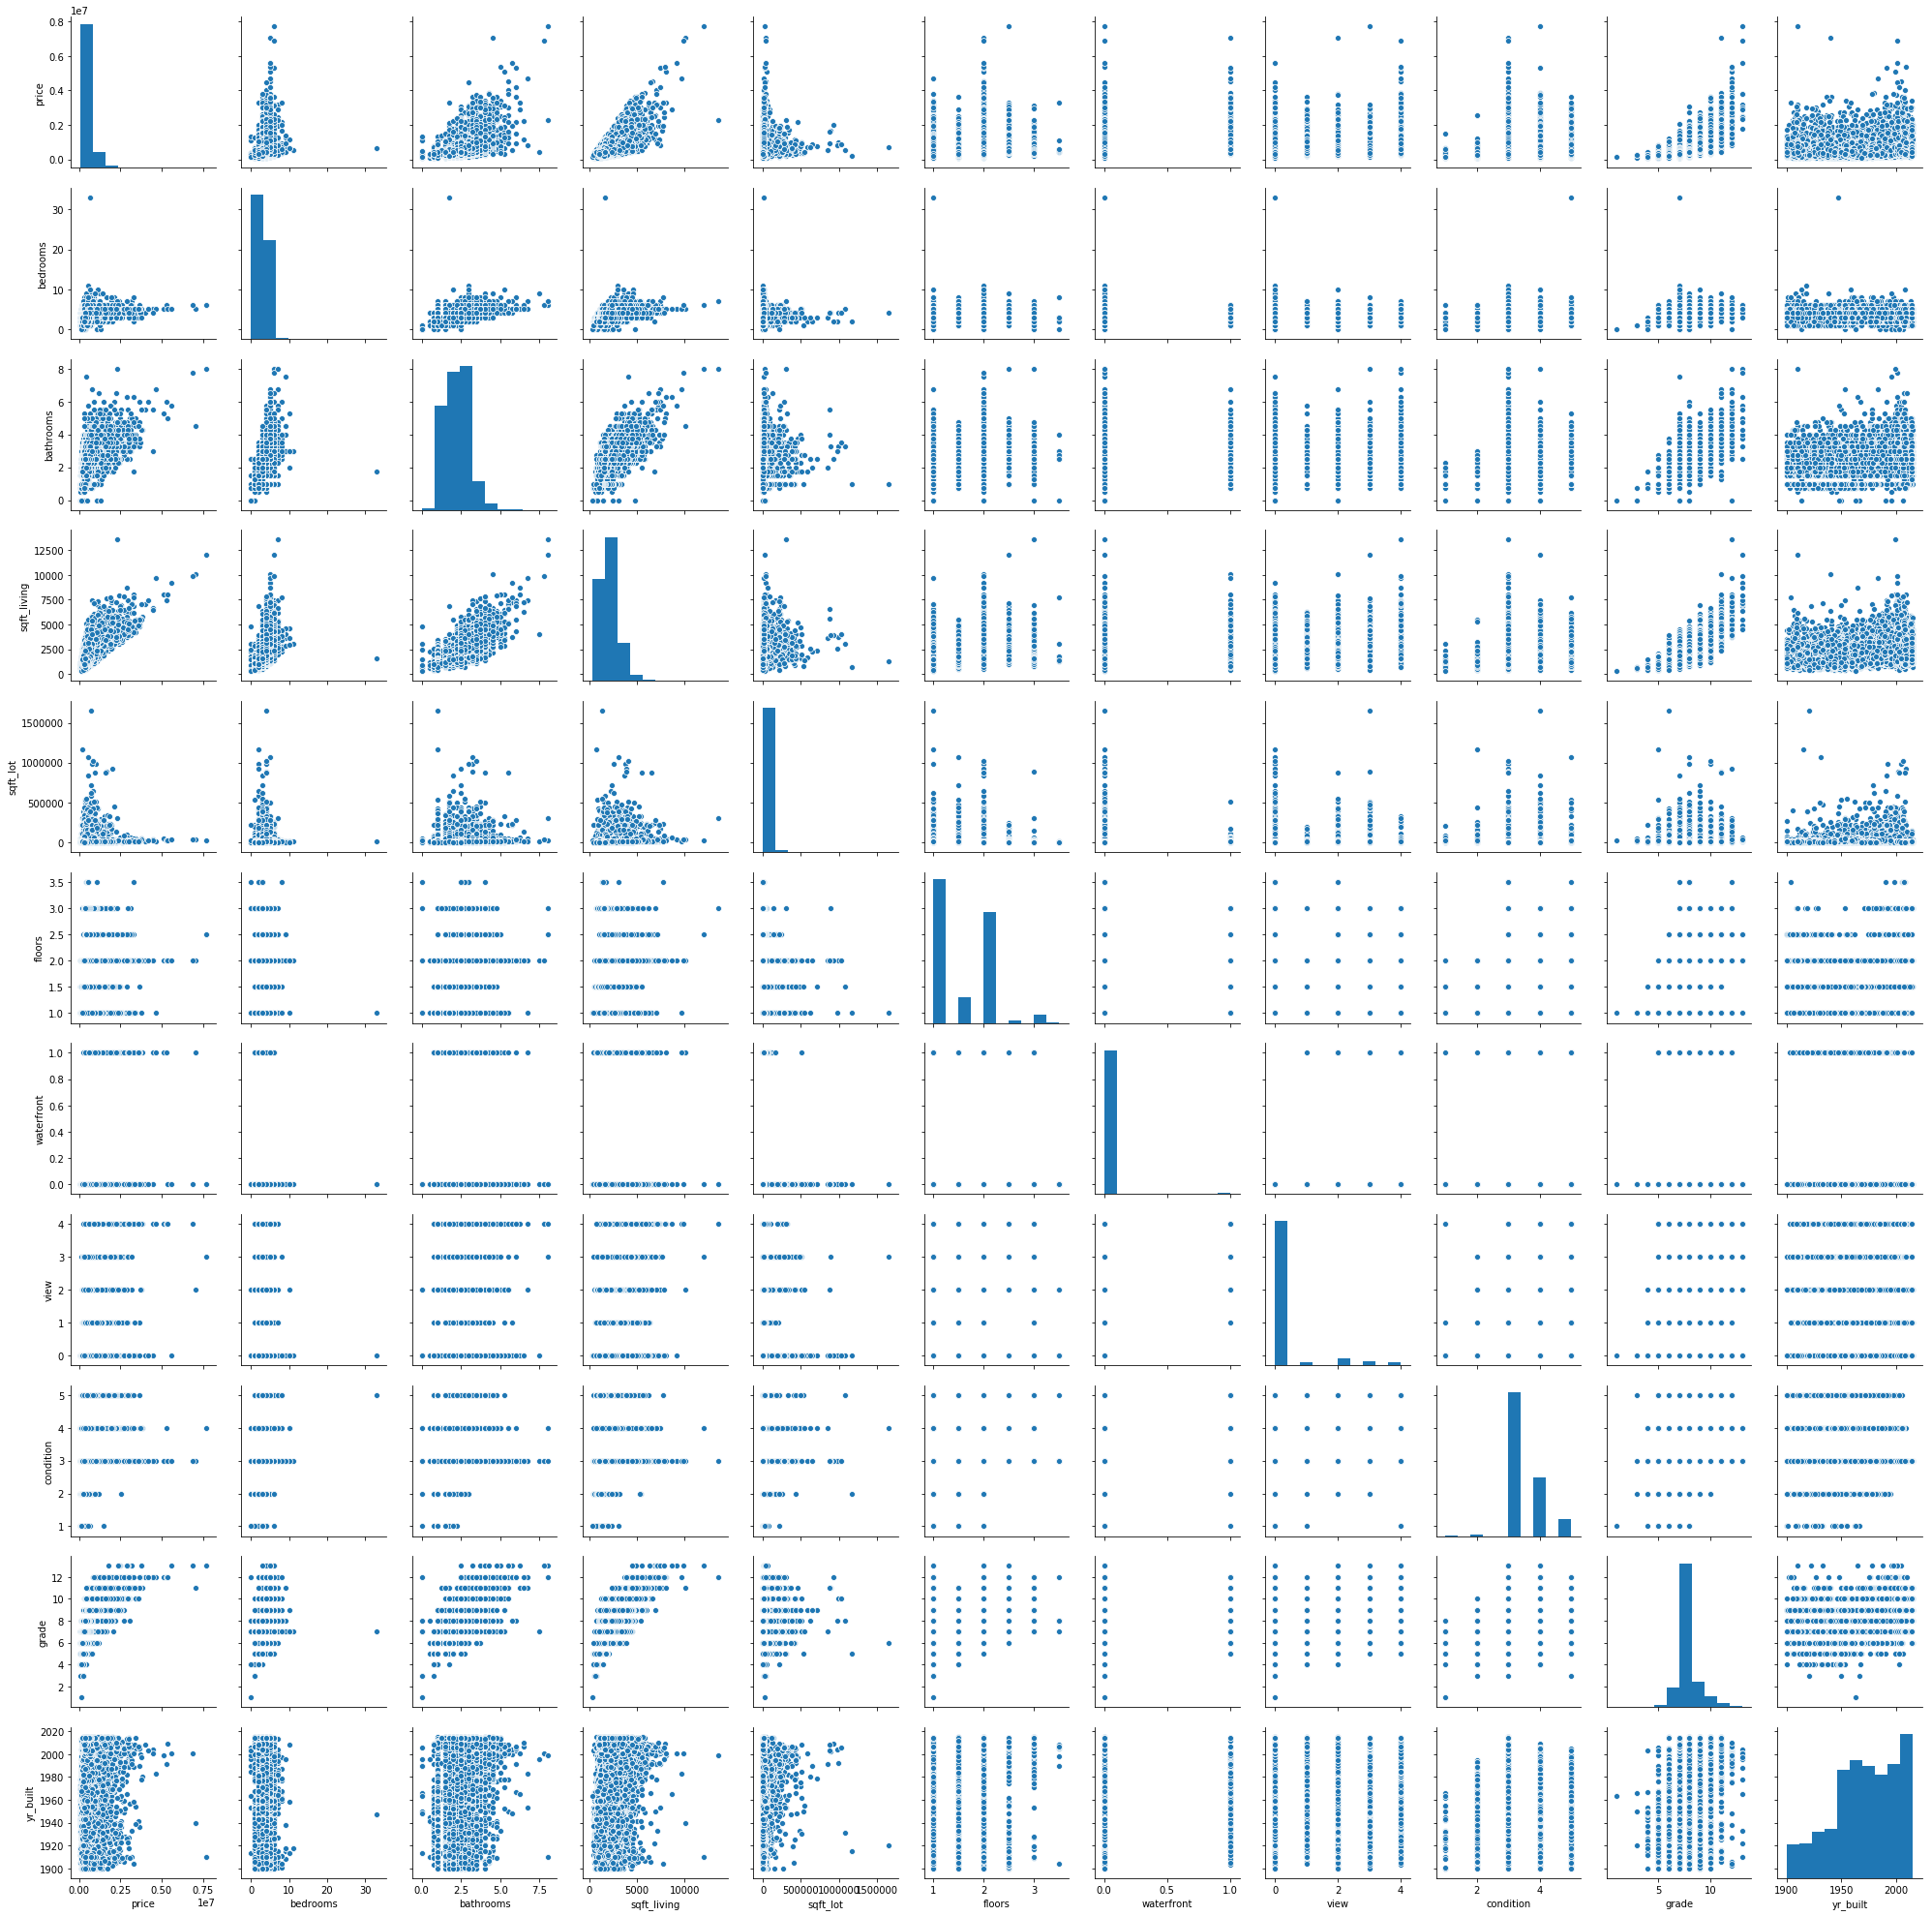

In [37]:
sns.pairplot(houses[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built']])

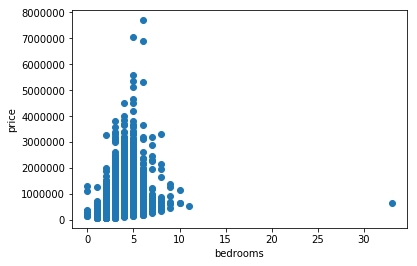

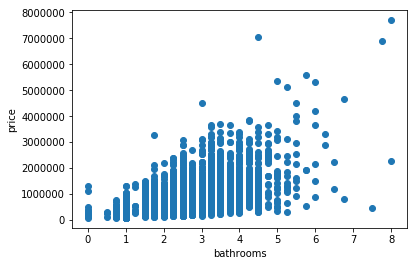

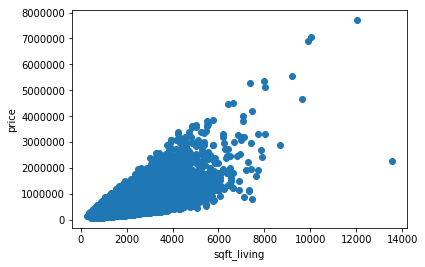

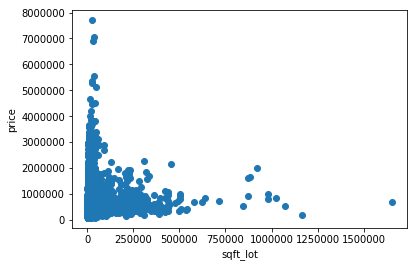

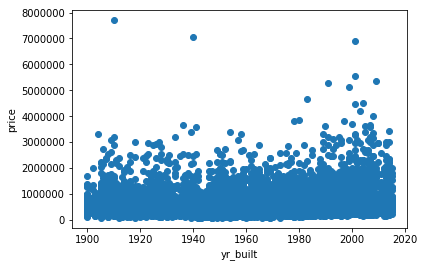

In [140]:
for feature in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built']:
    #plt.figure(figsize=(5,3))
    plt.scatter(houses[feature], houses['price'])
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.show()

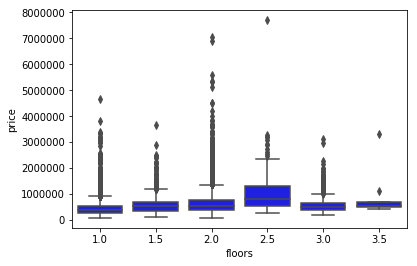

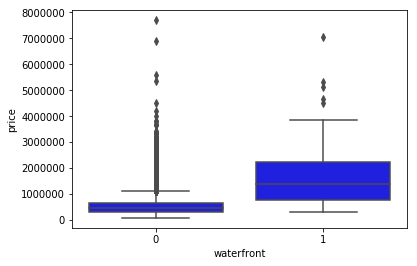

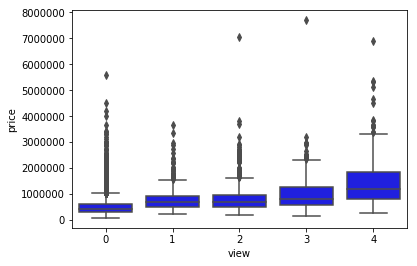

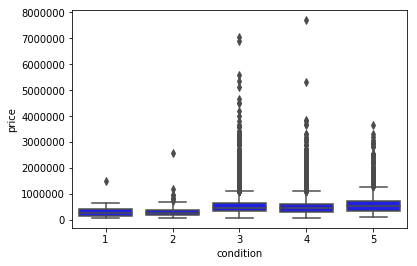

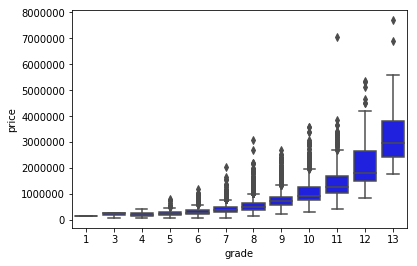

In [67]:
for feature in ['floors', 'waterfront', 'view', 'condition', 'grade']:
    sns.boxplot(x=feature, y='price', color= 'b', data=houses)
    plt.show()

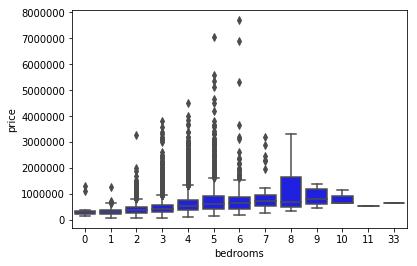

In [48]:
sns.boxplot(x='bedrooms', y='price', color= 'b', data=houses)

In [141]:
y_train.median()

449000.0

In [128]:
(y_test - y_train.mean()).abs().mean()

234100.74605072357

In [129]:
(y_test - y_train.median()).abs().mean()

226622.19360269362

In [133]:
y_train.std()

366279.940152074

In [99]:
houses['date_num'] = pd.to_numeric(houses.date_sold)

In [107]:
houses_test = houses[houses['date_sold']>='2015-03-01']
houses_train = houses[houses['date_sold']<'2015-03-01']
houses_train = houses_train.sort_values('date_num')
X_test = houses_test.drop(['price', 'date_sold'], axis=1)
y_test = houses_test['price']
X_train = houses_train.drop(['price', 'date_sold'], axis=1)
y_train = houses_train['price']

In [108]:
#scale features data
scaler = StandardScaler()
scaler.fit(X_train.astype(float))
X = scaler.transform(X_train.astype(float))

In [126]:
tscv = TimeSeriesSplit(n_splits=3)
knn_model = KNeighborsRegressor(n_neighbors = 10, weights= 'distance')
cross_val_score(knn_model, X, y_train, cv=tscv.split(X), scoring='neg_mean_absolute_error').astype(object)

array([-92146.66742486521, -93534.06871911885, -97753.20958064811],
      dtype=object)

In [144]:
np.array([-92146.66742486521, -93534.06871911885, -97753.20958064811]).mean()

-94477.98190821073

In [149]:
knn_model.fit(X, y_train)
(knn_model.predict(scaler.transform(X_test.astype(float))) - y_test).abs().mean()

105102.02623406448

In [127]:
rf_model = RandomForestRegressor(n_estimators=50)
cross_val_score(rf_model, X_train, y_train, cv=tscv.split(X_train), scoring='neg_mean_absolute_error')

array([-72909.22645789, -71544.47502254, -72099.95094662])

In [143]:
np.array([-72909.22645789, -71544.47502254, -72099.95094662]).mean()

-72184.55080901667

In [161]:
rf_model.fit(X, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [162]:
rf_model.feature_importances_.argsort()

array([12,  4,  0,  7,  1, 10, 16,  6, 13,  3, 11,  9,  5, 15, 14,  2,  8])

In [163]:
X_train.columns[rf_model.feature_importances_.argsort()]

Index(['yr_renovated', 'floors', 'bedrooms', 'condition', 'bathrooms',
       'sqft_basement', 'date_num', 'view', 'zipcode', 'sqft_lot', 'yr_built',
       'sqft_above', 'waterfront', 'long', 'lat', 'sqft_living', 'grade'],
      dtype='object')

In [151]:
gb_model = GradientBoostingRegressor(n_estimators=100)
cross_val_score(gb_model, X_train, y_train, cv=tscv.split(X_train), scoring='neg_mean_absolute_error')

array([-73260.20904179, -75661.62179848, -77265.55079167])

In [152]:
np.array([-73260.20904179, -75661.62179848, -77265.55079167]).mean()

-75395.79387731334

In [153]:
gb_model.fit(X, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [155]:
gb_model.feature_importances_.argsort()

array([ 0,  4, 16, 12,  1, 10,  7,  3, 13,  9,  6, 11,  5, 15, 14,  8,  2])

In [159]:
X_train.columns[gb_model.feature_importances_.argsort()]

Index(['bedrooms', 'floors', 'date_num', 'yr_renovated', 'bathrooms',
       'sqft_basement', 'condition', 'sqft_lot', 'zipcode', 'sqft_above',
       'view', 'yr_built', 'waterfront', 'long', 'lat', 'grade',
       'sqft_living'],
      dtype='object')

In [111]:
#run a grid search to find best params for knn model
tscv = TimeSeriesSplit(n_splits=3)
model = KNeighborsRegressor()
gcv = GridSearchCV(model, param_grid={"n_neighbors":range(5,7),
                                        "weights":["uniform","distance"]},
                   verbose=1,
                   cv=tscv.split(X),
                   error_score=np.nan)
gcv.fit(X, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   37.5s finished


GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x1a4a9420f8>,
       error_score=nan,
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(5, 7), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [114]:
gcv.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

In [ ]:
#run a grid search to find best params for knn model
tscv = TimeSeriesSplit(n_splits=3)
rf_model = RandomForestRegressor()
gcv = GridSearchCV(model, param_grid={"n_neighbors":range(10,60),
                                        "weights":["uniform","distance"]},
                   verbose=1,
                   cv=tscv.split(X),
                   error_score=np.nan)
gcv.fit(X, y_train)

In [ ]:
houses_limited_feat = houses['']

where do tree models perform better? In some particular segment or just a little bit across the board?

what features are the biggest predictors?

other ways to plot a skewed distribution: binning by quartiles, log scale